In [ ]:
run ../initialize.ipynb

In [1]:
from collections import defaultdict
from hax.minitrees import TreeMaker

class GateIonization(hax.minitrees.TreeMaker):
    __version__ = '1.0.0'
    uses_arrays=True
    #extra_branches = ['peaks.left', 'peaks.n_hits', 'peaks.area', 
    #                  'peaks.n_contributing_channels', 'peaks.n_contributing_channels_top',
    #                  'peaks.reconstructed_positions*', 'peaks.area_midpoint']
    extra_branches = ['peaks.*']

 
    def extract_data(self, event): 
       
        result = {}
        if not len(event.interactions):
            return dict()
        
        interaction = event.interactions[0]
        #s2 = interaction.s2
        peak_s2 = event.peaks[interaction.s2]
        peak_s1 = event.peaks[interaction.s1]
        
        #result['sum_waveform'] = np.array(list(peak.sum_waveform))
        try:
            result['sum_waveform_s2'] = np.array(list(peak_s2.sum_waveform))
            result['sum_waveform_s1'] = np.array(list(peak_s1.sum_waveform))
            result['s2_range_50p_area'] = peak_s2.range_area_decile[5]
            result['s1_range_50p_area'] = peak_s1.range_area_decile[5]
            result['s2_range_90p_area'] = peak_s2.range_area_decile[9]
            result['s1_range_90p_area'] = peak_s1.range_area_decile[9]
            #result['s1_full_range'] = peak_s1.full_range
            result['s1_left'] = peak_s1.left
            result['s1_right'] = peak_s1.right
            result['s2_left'] = peak_s1.left
            result['s2_right'] = peak_s1.right
            #result['s2_full_range'] = peak_s1.full_range
        except IndexError:
            result['sum_waveform_s1']=[]
            result['sum_waveform_s2']=[]
            result['s2_range_50p_area']=np.nan
            result['s1_range_50p_area']=np.nan
            result['s2_range_90p_area']=np.nan
            result['s1_range_90p_area']=np.nan
            #result['s1_full_range'] = np.nan
            #result['s2_full_range'] = np.nan
            result['s1_left'] = np.nan
            result['s1_right'] = np.nan
            result['s2_left'] = np.nan
            result['s2_right'] = np.nan
    
        return result

NameError: name 'hax' is not defined

In [3]:
hax.init(experiment='XENON1T', 
        pax_version_policy = '6.8.0',
        main_data_paths = ['/project2/lgrandi/xenon1t/processed', '/project/lgrandi/xenon1t/processed'],
        minitree_paths = [
        '/scratch/midway2/jpienaar/minitrees/',
        '/project2/lgrandi/xenon1t/minitrees/pax_v6.8.0',
        '/project/lgrandi/xenon1t/minitrees/pax_v6.8.0',
        ],
        minitree_caching=False,
        )  

### Radon SR1 Data ####

In [4]:
datasets = hax.runs.datasets # this variable holds all dataset info
datasets = hax.runs.tags_selection(include=['*sciencerun1'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets_radon = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
datasets_radon = hax.cuts.selection(datasets_radon, datasets_radon['location'] != '', 'Processed data available')
run_numbers_radon = datasets_radon['number'].values
print('Total of %d datasets' % len(run_numbers_radon))

Source in place selection: 5612 rows removed (5.82% passed)
Processed data available selection: 0 rows removed (100.00% passed)
Total of 347 datasets


In [18]:
%%time
print('Loading data')
data_radon_sr1 = hax.minitrees.load(run_numbers_radon[0:1],
                        treemakers = [AnodeIonization, 'Basics'],
                        #preselection = ['s2 > 5000'],
                        num_workers=8,
                        force_reload=True,
                        )
#data_radon['r'] = np.sqrt(data_radon['x']**2 + data_radon['y']**2)

Loading data



Run 7859: Making Basics minitree: 100%|██████████| 198876/198876 [07:18<00:00, 453.78it/s]

CPU times: user 17min 1s, sys: 1min 3s, total: 18min 4s
Wall time: 46min 26s


### Kr SR1 Data ####

In [6]:
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
datasets_kr = hax.cuts.selection(datasets_kr, datasets_kr['location'] != '', 'Processed data available')
run_numbers_kr = datasets_kr['number'].values
print('Total of %d datasets' % len(run_numbers_kr))

Source in place selection: 5596 rows removed (6.09% passed)
Processed data available selection: 0 rows removed (100.00% passed)
Total of 363 datasets


In [19]:
%%time
print('Loading data')
data_kr_sr1 = hax.minitrees.load(run_numbers_kr[0:1],
                        treemakers = [AnodeIonization, 'Basics'],
                        #preselection = ['s2 > 5000'],
                        num_workers=8,
                        force_reload=True,
                        )
#data_radon['r'] = np.sqrt(data_radon['x']**2 + data_radon['y']**2)

Loading data



Run 6842: Making Basics minitree: 100%|██████████| 172446/172446 [02:42<00:00, 1064.26it/s]

CPU times: user 8min 19s, sys: 40.1 s, total: 8min 59s
Wall time: 20min 48s


In [20]:
data_sets={'Kr': data_kr_sr1, 'Radon': data_radon_sr1}#, 'Kr': data_kr, 'NG':data_ng}
c_map={'Kr': 'blue', 'Radon': 'red'}

In [ ]:
data_cut = hax.cuts.selection(data_radon_sr1, data_radon_sr1['s1_range_50p_area']<2500, "Width Selection")

Size Selection selection: 42627 rows removed (75.28% passed)
Width Selection selection: 105456 rows removed (18.77% passed)
Size Selection selection: 136372 rows removed (31.43% passed)
Width Selection selection: 43853 rows removed (29.84% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


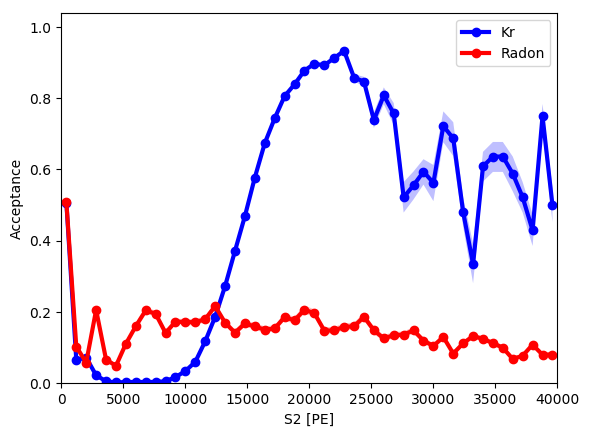

In [22]:
from statsmodels.stats.proportion import proportion_confint

binomial_error_method = 'wilson'
binomial_alpha = 0.68

#data=data_radon_sr1
subfig_index=0
_bins=50
_xupper=40000
_xrange=[0,_xupper]
for key, data in data_sets.items():
    #plt.title('Fig %i.%i: Acceptance of S1SingleScatter cut on %s data' %(fig_index, subfig_index, key))

    #Data
    data_pass= hax.cuts.selection(data, data['s2']<_xupper, "Size Selection")
    data_pass= hax.cuts.selection(data_pass, data_pass['s2_range_90p_area']<2500, "Width Selection")

    #Acceptance
    width_pass, bins = np.histogram(data_pass['s2'], bins = _bins, range=_xrange)
    width_total, bins_total = np.histogram(data['s2'], bins = _bins, range=_xrange)
    width_acceptance = width_pass/width_total

    #Error
    width_error =  proportion_confint(np.histogram(data_pass['s2'], bins = _bins, range=_xrange)[0],
                                        np.histogram(data['s2'], bins = _bins, range=_xrange)[0],
                                        method=binomial_error_method, alpha=binomial_alpha)

    width_error[0][np.isnan(width_acceptance)] = 0
    width_error[1][np.isnan(width_acceptance)] = 1
    width_acceptance[np.isnan(width_acceptance)] = 0.5

    #Bin  width
    bins_width = (bins[:-1]-bins[1:])/2

    #Plot Acceptance
    plt.plot(bins[1:]+bins_width, width_acceptance, linewidth=3,  color=c_map[key], marker='o',  label=key)

    #Confidence Bands
    y1=width_error[0]
    y2=width_error[1]
    plt.fill_between(bins[1:]+bins_width, y1, y2, where=y2 >= y1, facecolor=c_map[key], interpolate=True, alpha = 0.25)

    #Figure Parameters
    plt.xlim(_xrange)
    plt.ylabel('Acceptance')
    plt.xlabel('S2 [PE]')
    plt.ylim(0, 1.04)  

plt.legend()
plt.savefig('Width_bounds_s2.png', bbox_inches='tight')
#plt.savefig('Width_bounds-s2.pdf' , bbox_inches='tight')
plt.show()

Size Selection selection: 41709 rows removed (75.81% passed)
Width Selection selection: 0 rows removed (100.00% passed)
Size Selection selection: 186223 rows removed (6.36% passed)
Width Selection selection: 0 rows removed (100.00% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


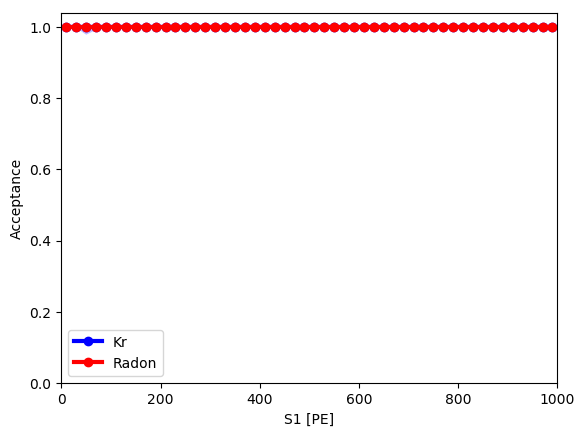

In [21]:
from statsmodels.stats.proportion import proportion_confint

binomial_error_method = 'wilson'
binomial_alpha = 0.68

data=data_radon_sr1


subfig_index=0
_bins=50
_xupper=1000
_xrange=[0,_xupper]
for key, data in data_sets.items():
    #plt.title('Fig %i.%i: Acceptance of S1SingleScatter cut on %s data' %(fig_index, subfig_index, key))

    #Data
    data_pass= hax.cuts.selection(data, data['s1']<_xupper, "Size Selection")
    data_pass= hax.cuts.selection(data_pass, data_pass['s1_range_50p_area']<2500, "Width Selection")

    #Acceptance
    width_pass, bins = np.histogram(data_pass['s1'], bins = _bins, range=_xrange)
    width_total, bins_total = np.histogram(data['s1'], bins = _bins, range=_xrange)
    width_acceptance = width_pass/width_total

    #Error
    width_error =  proportion_confint(np.histogram(data_pass['s1'], bins = _bins, range=_xrange)[0],
                                        np.histogram(data['s1'], bins = _bins, range=_xrange)[0],
                                        method=binomial_error_method, alpha=binomial_alpha)

    width_error[0][np.isnan(width_acceptance)] = 0
    width_error[1][np.isnan(width_acceptance)] = 1
    width_acceptance[np.isnan(width_acceptance)] = 0.5

    #Bin  width
    bins_width = (bins[:-1]-bins[1:])/2

    #Plot Acceptance
    plt.plot(bins[1:]+bins_width, width_acceptance, linewidth=3,  color=c_map[key], marker='o',  label=key)

    #Confidence Bands
    y1=width_error[0]
    y2=width_error[1]
    plt.fill_between(bins[1:]+bins_width, y1, y2, where=y2 >= y1, facecolor=c_map[key], interpolate=True, alpha = 0.25)

    #Figure Parameters
    plt.xlim(_xrange)
    plt.ylabel('Acceptance')
    plt.xlabel('S1 [PE]')
    plt.ylim(0, 1.04)  

plt.legend()
plt.savefig('Width_bounds_s1.png', bbox_inches='tight')
#plt.savefig('Width_bounds_s1.pdf' , bbox_inches='tight')
plt.show()


In [ ]:
%%time

dt = 10 * units.ns
wv_length = pax_config['BasicProperties.SumWaveformProperties']['peak_waveform_length']
waveform_ts = np.arange(-wv_length/2, wv_length/2 + 0.1, dt)

for run in run_numbers_radon[:10]:#[7860, 7861]: 
    filename = '%d_waveforms.npz' % run
    
    data = hax.minitrees.load(run, treemakers='Basics', num_workers=8)
    
    if os.path.exists(filename):
        waveforms = np.load(filename)['arr_0']
    else:
        n_peaks = len(data)
        waveforms = np.zeros((n_peaks, len(waveform_ts)))
        peak_i = -1
        def store_waveforms(event):
            global peak_i
            try: 
                interaction = event.interactions[0]
                s2 = interaction.s2
                peak = event.peaks[s2]
                peak_i+=1
                waveforms[peak_i, :] = np.array(list(peak.sum_waveform))
            except IndexError:
                peak_i+=1
                waveforms[peak_i, :] = np.zeros(len(waveform_ts))
            
        hax.paxroot.loop_over_dataset(run, store_waveforms, 
                                      branch_selection=hax.treemakers.common.Basics().branch_selection + ['peaks.sum_waveform*'],
                                      desc='Storing waveforms for run %d' % run)
        if not peak_i == n_peaks - 1:
            raise ValueError("mismatch in number of single electrons; expected %d got %d" % (n_peaks, peak_i - 1))
        np.savez_compressed(filename, waveforms)
        
          

In [ ]:
len(waveforms)

In [ ]:
plt.plot(waveform_ts, waveforms[1001])
plt.show()

In [ ]:
from hax.treemakers.peak_treemakers import PeakExtractor

dt = 10 * units.ns
wv_length = pax_config['BasicProperties.SumWaveformProperties']['peak_waveform_length']
waveform_ts = np.arange(-wv_length/2, wv_length/2 + 0.1, dt)

class GetS1s(PeakExtractor):
    __version__ = '0.0.1'
    uses_arrays = True
    # (don't actually need all properties, but useful to check if there's some problem)
    peak_fields = ['area', 'range_50p_area', 'area_fraction_top', 
                   'n_contributing_channels', 'left', 'hit_time_std', 'n_hits',
                   'type', 'detector', 'center_time', 'index_of_maximum',
                   'sum_waveform',
                  ]
    peak_cut_list = ['detector == "tpc"', 'type == "s2"']
    
    def get_data(self, dataset, event_list=None):
        # Get the event list from the dataframe selected above
        event_list = data[data['run_number'] == hax.runs.get_run_number(dataset)]['event_number'].values
        
        return PeakExtractor.get_data(self, dataset, event_list=event_list)
    
    def extract_data(self, event):
        peak_data = PeakExtractor.extract_data(self, event)
        
        # Convert sum waveforms from arcane pyroot buffer type to proper numpy arrays
        for p in peak_data:
            p['sum_waveform'] = np.array(list(p['sum_waveform']))
            
        return peak_data

In [ ]:
s1s = hax.minitrees.load(7868, GetS1s, num_workers=5)